In [1]:
# dataframe
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot
import missingno as msno
from wordcloud import WordCloud
from PIL import Image

# request
import requests

# tensorflow, for NN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPooling1D, Dropout

# NLTK, NLP Libraries
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

# sklearn, for preprocessing & scoring
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/abdullahcetin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# read dataframe
df = pd.read_csv('/Volumes/abdullah/Programlama/PYTHON/Miul/git_folder/Data_set/Womens Clothing E-Commerce Reviews.csv')
print('Shape of DataFrame(before preprocess): ',df.shape,'\n')
df.head(2)

Shape of DataFrame(before preprocess):  (23486, 11) 



Unnamed: 0  Clothing ID  Age Title  \
0           0          767   33   NaN   
1           1         1080   34   NaN   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   

   Positive Feedback Count Division Name Department Name Class Name  
0                        0     Initmates        Intimate  Intimates  
1                        4       General         Dresses    Dresses

In [3]:
df.isnull().sum()/len(df)*100

Unnamed: 0                  0.000000
Clothing ID                 0.000000
Age                         0.000000
Title                      16.222430
Review Text                 3.597888
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059610
Department Name             0.059610
Class Name                  0.059610
dtype: float64

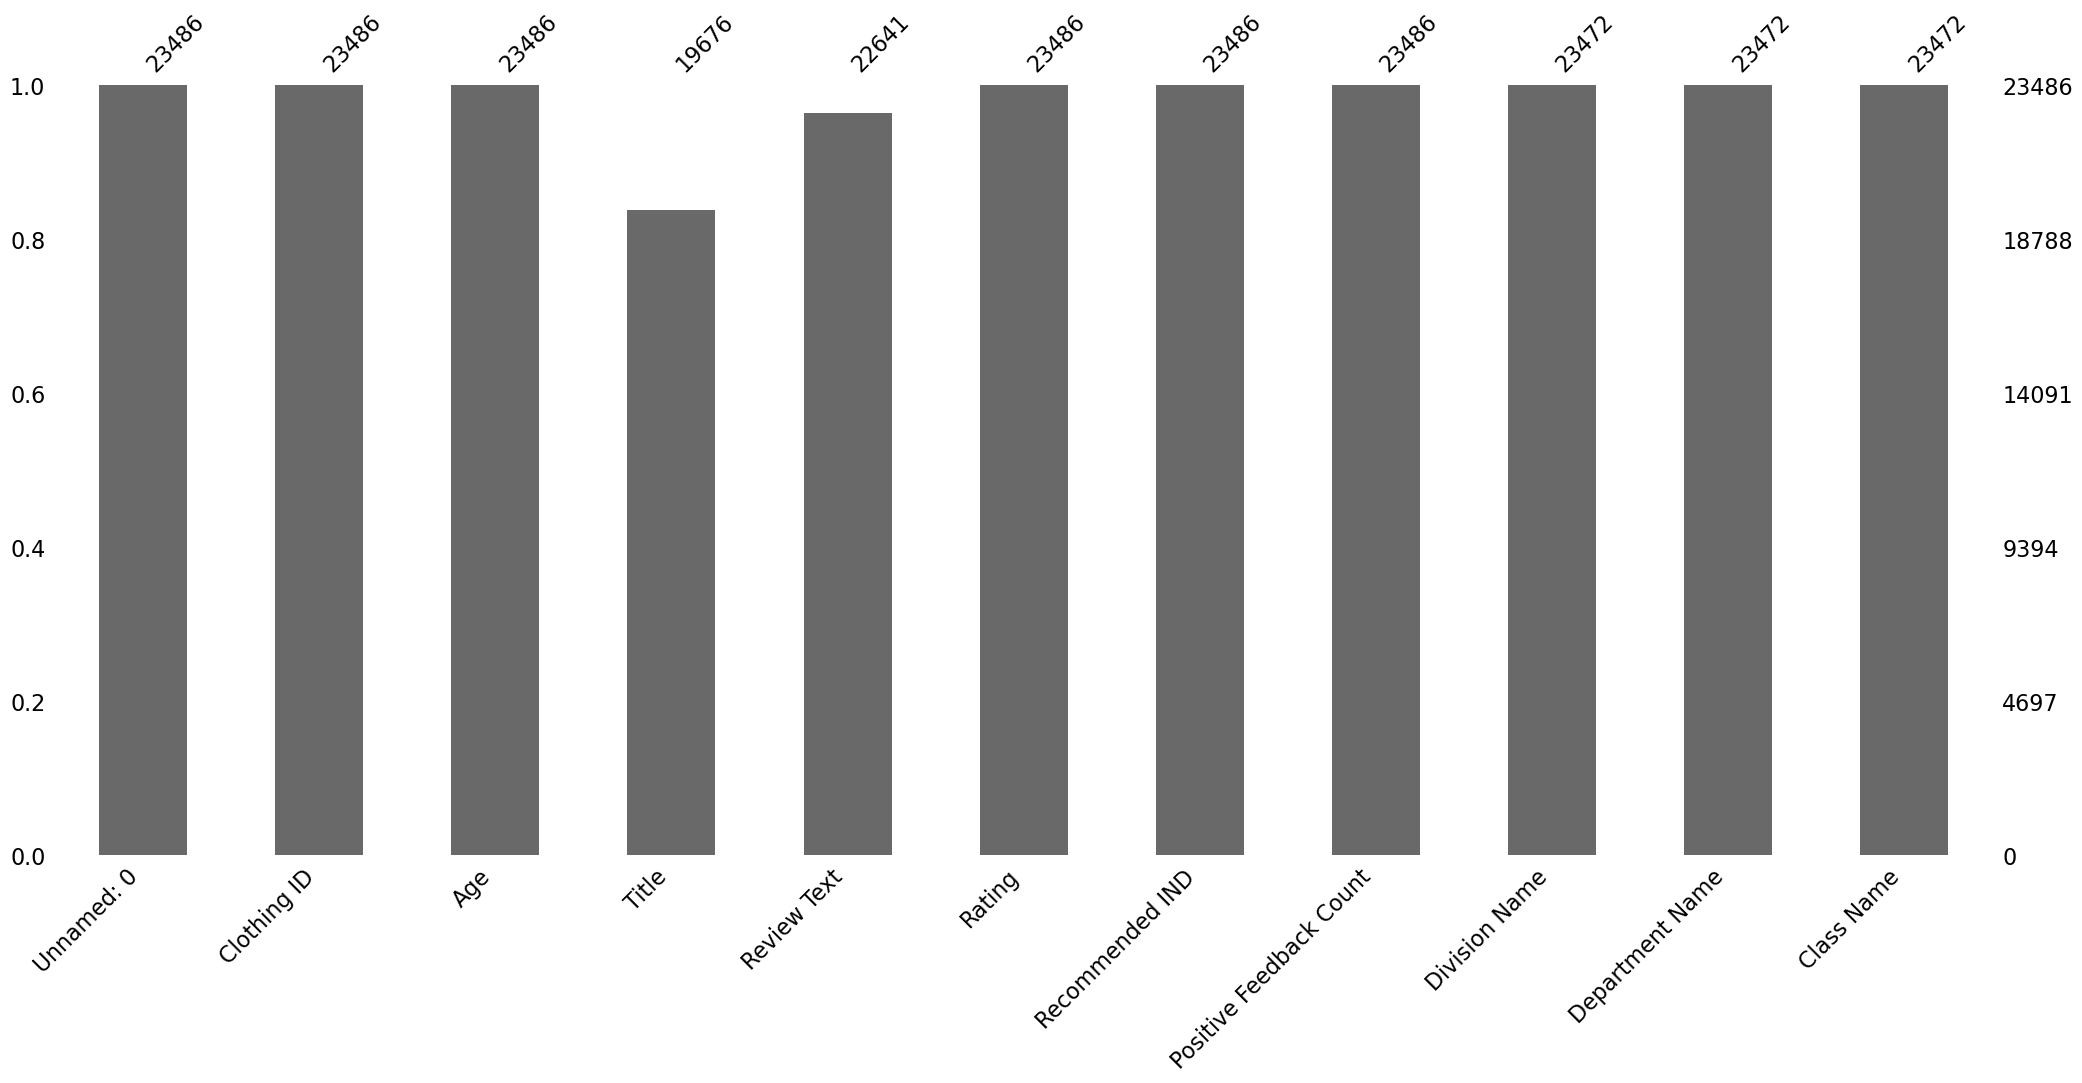

In [4]:
msno.bar(df)
plt.show()

spahe of dataframe :  (19662, 8)


Text(0.5, 1.0, 'Distribution of missing value (after)')

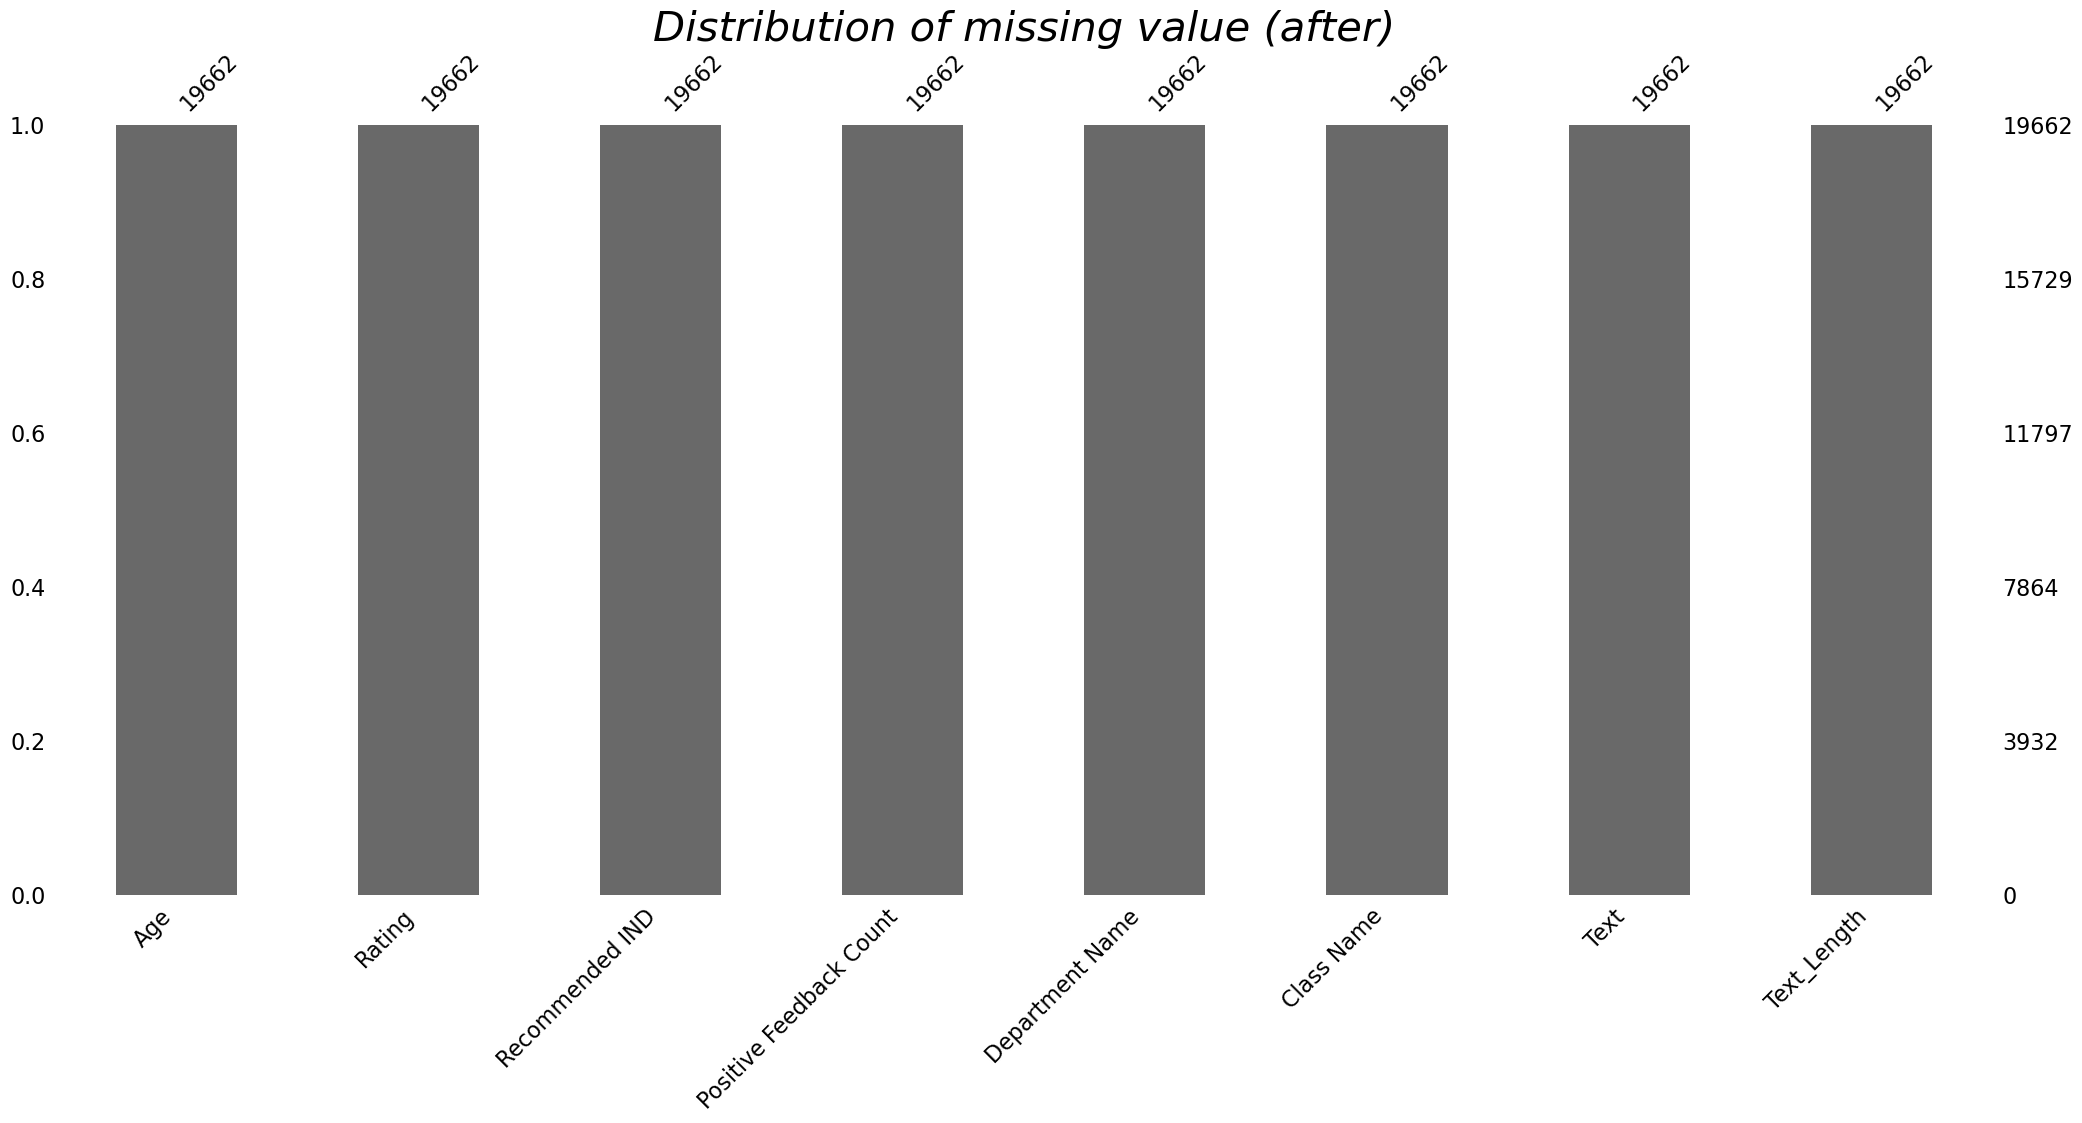

In [5]:
df.drop (['Unnamed: 0','Clothing ID'], axis=1, inplace=True)
df.dropna(subset=['Review Text','Division Name', 'Title'], inplace=True)
df['Text'] = df['Title']+ ' '+ df['Review Text']

df.drop(['Title', 'Review Text','Division Name'], axis=1, inplace=True)
df=df.reset_index().drop('index', axis=1)
df['Text_Length']= df['Text'].apply(len)
print('spahe of dataframe : ',df.shape)

msno.bar(df).set_title('Distribution of missing value (after)', fontsize =30 , fontstyle='oblique')

In [6]:
# describtion of 5 numeric columns
describe=df.describe(include =['float', 'int'])
describe.T.style.background_gradient(low=0.2,high=0.5,cmap = 'rocket_r')

In [7]:
age= df.Age.value_counts().sort_index()
age_range = [10*i for i in range(1,10)]
store = []
age_df=pd.DataFrame(columns=['count','age'])
for idx,count in enumerate(age_range):
    store.append([age[num]for idx, num in enumerate(age.index)if num >=count and num<=count+9])
age=[str(num)+' to '+str(num+9)for num in age_range]
age_df['count'] = [sum(num)for num in store]
age_df['age']=age



In [8]:
hist_data=[df['Age']]
group_labels=['Age Distribution']

fig1=ff.create_distplot(hist_data, group_labels,show_hist=False, colors=['#32CD32'])
fig1.update_layout(title='Age Distribution', template = 'simple_white')


fig2=px.bar(x=age_df['age'],
            y=age_df['count'],
            text=age_df['count'],color=age_df['age'],
            color_discrete_sequence=px.colors.sequential.Greens,
            template="simple_white",
            title='Age Bar Plot')
idx = [num for num in range(2,5)]
for index in idx:
    fig2.data[index].marker.line.width = 2
    fig2.data[index].marker.line.color = "black"

fig2.update_traces(
                  textfont_size=14,  # Yazı boyutunu artır
                  textposition='outside',  # Yazıyı barın dışına al
                  marker_line_width=1.5,  # Kenarlık kalınlığını tüm barlar için ayarla
                  marker_line_color="black")
fig1.update_layout(
    font=dict(size=17,family="Franklin Gothic"),
    showlegend=False)
fig2.update_layout(
    xaxis_title="Age Range",
    yaxis_title="count",
    font=dict(size=17,family="Franklin Gothic"))

fig1.show()
fig2.show()

In [9]:
rating = df['Rating'].value_counts()
# 2 subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

recommended = df['Recommended IND'].value_counts()
recommended = df['Recommended IND'].value_counts().sort_values(ascending=False)

# 1. Rating
fig.add_trace(go.Pie(values=rating.values,
             labels=rating.index, 
             marker=dict(colors=['#fddbc7','#f4a582','#d6604d','#b2182b','#67001f']),
             title= 'Rating',titlefont=dict(size=17)),row=1,col=1)

# 2. Recommended IND
fig.add_trace(go.Pie(values=recommended.values, 
             labels=recommended.index, 
             marker=dict(colors=['#fddbc7','#b2182b']),
             title= 'Recommended IND',titlefont=dict(size=17)),row=1,col=2)

fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                  marker=dict(line=dict(color='black', width=0.2)))
fig.update_layout(
    font=dict(size=17,family="Franklin Gothic"))

In [10]:
fig4 = px.violin(df,
                 y='Positive Feedback Count',
                 box=True,  # Kutu grafiğini de içinde göster
                 points="all",  # Tüm noktaları göster
                 color_discrete_sequence=['#32CD32'],  # Yeşil renk
                 template="simple_white",
                 title='Positive Feedback Count Keman Grafiği')

fig4.update_layout(
    font=dict(size=17, family="Franklin Gothic"),
    yaxis_title="Olumlu Geri Bildirim Sayısı"
)

fig4.show()


In [11]:

recommended = df[df['Recommended IND'] == 1]
recommended_n = df[df['Recommended IND']==0]

hist_data = [recommended['Text_Length'], recommended_n['Text_Length']]
group_labels = ['Text of Recommended Comments','Text of Unrecommended Comments']

fig = ff.create_distplot(hist_data, group_labels,show_hist = False, colors=['#2166ac','#b2182b'])
fig.update_layout(title = 'Text Length by Recommended IND',
                  font = dict(size=17, family = 'Franklin Gothic'),template = "simple_white") 
fig.show()

In [12]:
recommended = df[df['Recommended IND'] == 1]
recommended_n = df[df['Recommended IND']==0]

hist_data = [recommended['Text_Length'], recommended_n['Text_Length']]
group_labels = ['Text of Recommended Comments','Text of Unrecommended Comments']

fig = ff.create_distplot(hist_data, group_labels,show_hist = False, colors=['#2166ac','#b2182b'])
fig.update_layout(title = 'Text Length by Recommended IND',
                  font = dict(size=17, family = 'Franklin Gothic'),template = "simple_white") 
fig.show()

In [13]:
fig = px.treemap(df, 
                 path=['Department Name','Class Name'],
                 title = ' Tree Map: Department & Class Name',
                 color_discrete_sequence=px.colors.sequential.RdBu,
                 width=1200, height=600)

fig.update_traces(textinfo='label+value', textfont_size=13,
                  marker=dict(line=dict(color='white', width=0.2)))
fig.update_layout(font = dict(size=17, family = 'Franklin Gothic'))
fig.show()

In [14]:
# functions:

# get all of strings from sentences
def get_all_str(sentences):
    sentence = ''
    for words in sentences:
        sentence += words
    sentence = sentence.lower()
    return sentence

# get string from list
def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence

# get word from text
def get_word(text): 
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
    return result

# remove stopwords from list
def remove_stopword(lst):    
    stoplist = stopwords.words('english')
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist] 
#     print(stoplist)
    return cleanwordlist

# lemmatize
def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
    return tokens

# get frequency dataframe which consists of frequency and term
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

# function to plot word cloud of words
def Word_Cloud(data, color_background, colormap, title, mask):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=800, 
               height=400, 
               max_words=340,
               mask = mask,
               colormap= colormap,
               max_font_size=200,
               min_font_size = 1 ,
               random_state=8888, 
               background_color=color_background).generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

#   function to preprocess
def preprocess(column):
    all_str = get_all_str(column)
    words = get_word(all_str)
    after_removing = remove_stopword(words)
    lemmatize = lemmatization(after_removing)
    frequency_df = Freq_df(lemmatize)
    return frequency_df

# preprocess -> get frequency dataframe -> plot Word Cloud
def create_wordcloud(column, title, color, mask):
    frequency_df = preprocess(column)
    data = frequency_df.set_index('Term').to_dict()['Frequency']
    Word_Cloud(data, 'white',color,title, mask)

In [15]:
from PIL import Image
# Görsel dosyasını yükle (kendi dosya yolunuzla değiştirin)
mask = np.array(Image.open('/Volumes/abdullah/Programlama/PYTHON/Miul/git_folder/Data_set/woman-2.jpg'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abdullahcetin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abdullahcetin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


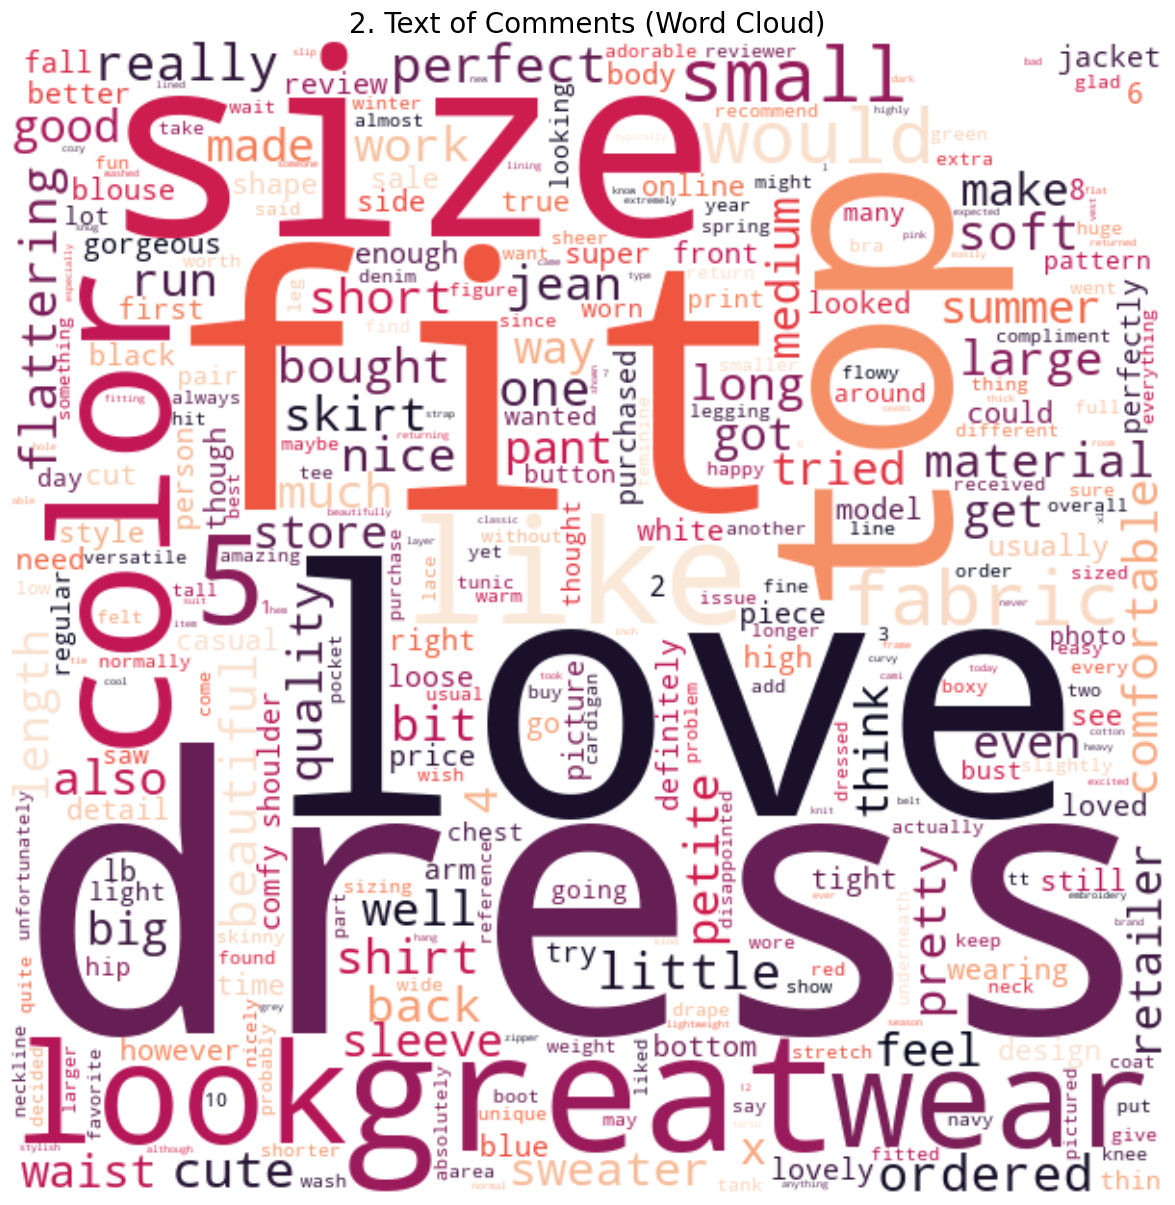

In [16]:
import nltk

nltk.download('averaged_perceptron_tagger')  
nltk.download('stopwords')
nltk.download('wordnet')
top10_frequent = preprocess(df['Text'])[:10]

# 1. bar plot
fig = px.bar(top10_frequent, 
             x = 'Term', y = 'Frequency',
             text = 'Frequency',
             color_discrete_sequence = px.colors.sequential.RdBu, 
             title = '1. Top 10 frequent terms (bar plot)', 
             color='Term',template = "simple_white")
fig.update_layout(font = dict(size=17, family = 'Franklin Gothic'))
fig.show()

# 2. Word Cloud
create_wordcloud(df['Text'],'2. Text of Comments (Word Cloud)','rocket', mask)

In [17]:
for idx in range(len(age_range)):
    df.loc[np.logical_and(df['Age']>=age_range[idx],df['Age']<=age_range[idx]+9), 'AgeGroup'] = age[idx]
df['Age'] = df['AgeGroup']
df.drop('AgeGroup',axis=1,inplace=True)

ten = df.groupby(['Age','Department Name']).size()['10 to 19']
twe = df.groupby(['Age','Department Name']).size()['20 to 29']
thi = df.groupby(['Age','Department Name']).size()['30 to 39']
fou = df.groupby(['Age','Department Name']).size()['40 to 49']
fif = df.groupby(['Age','Department Name']).size()['50 to 59']
six = df.groupby(['Age','Department Name']).size()['60 to 69']
sev = df.groupby(['Age','Department Name']).size()['70 to 79']
eig = df.groupby(['Age','Department Name']).size()['80 to 89']
nin = df.groupby(['Age','Department Name']).size()['90 to 99']
marker_color = ['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7','#d1e5f0','#92c5de','#4393c3','#2166ac']

In [19]:
# bar plot: Department by Age
fig = go.Figure(data=[
    go.Bar(name='10 to 19', 
           x=ten.index, y=ten.values/sum(ten),
           text=np.round(ten.values/sum(ten),2), 
           marker_color=marker_color[0]),
    
    go.Bar(name='20 to 29', x=twe.index, y=twe.values/sum(twe),
           text=np.round(twe.values/sum(twe),2), 
           marker_color=marker_color[1]),
    
    go.Bar(name='30 to 39', x=thi.index, y=thi.values/sum(thi),
           text=np.round(thi.values/sum(thi),2), 
           marker_color=marker_color[2]),
    
    go.Bar(name='40 to 49', x=fou.index, y=fou.values/sum(fou),
           text=np.round(fou.values/sum(fou),2), 
           marker_color=marker_color[3]),
    
        go.Bar(name='50 to 59', x=fif.index, y=fif.values/sum(fif),
           text=np.round(fif.values/sum(fif),2), 
               marker_color=marker_color[4]),
    
    go.Bar(name='60 to 69', x=six.index, y=six.values/sum(six),
           text=np.round(twe.values/sum(six),2), 
           marker_color=marker_color[5]),
    
    go.Bar(name='70 to 79', x=sev.index, y=sev.values/sum(sev),
           text=np.round(thi.values/sum(sev),2),
           marker_color=marker_color[6]),
    
    go.Bar(name='80 to 89', x=eig.index, y=eig.values/sum(eig),
           text=np.round(fou.values/sum(eig),2), 
           marker_color=marker_color[7]),
    
    go.Bar(name='90 to 99', x=nin.index, y=nin.values/sum(nin),
           text=np.round(nin.values/sum(nin),2), 
           marker_color=marker_color[8]),
])

fig.update_layout(xaxis_tickangle=-45, title='Department Name by Age',
                  font = dict(size=17, family = 'Franklin Gothic'), template = "simple_white")
fig.show()

In [20]:
depart_rate = df.groupby(['Department Name','Rating']).size()
Bottoms = np.round(depart_rate['Bottoms'].values/depart_rate['Bottoms'].values.sum(),2)
Dresses = np.round(depart_rate['Dresses'].values/depart_rate['Dresses'].values.sum(),2)
Intimate = np.round(depart_rate['Intimate'].values/depart_rate['Intimate'].values.sum(),2)
Jackets = np.round(depart_rate['Jackets'].values/depart_rate['Jackets'].values.sum(),2)
Tops = np.round(depart_rate['Tops'].values/depart_rate['Tops'].values.sum(),2)
Trend = np.round(depart_rate['Trend'].values/depart_rate['Trend'].values.sum(),2)

In [21]:
# 1.radar plot
fig.show()
# 2. bar plot
fig2.show()

In [22]:
def pos_adjective(tagged):
    only_adjective = [word for word,pos in tagged if pos in ['JJ','JJR','JJS'
                                                          ]]
    stopwords = ['top']
    txt = ''
    for i in range(len(only_adjective)):
        txt += only_adjective[i]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stopwords] 
    return cleanwordlist

def preprocess_adj(column):
    all_str = get_all_str(column)
    words = get_word(all_str)
    after_removing = remove_stopword(words)
    lemmatize = lemmatization(after_removing)
    tagged = nltk.pos_tag(lemmatize)
    postag = pos_adjective(tagged)
    frequency_df = Freq_df(postag)
    return frequency_df

def create_adj_wordcloud(column, title, color,mask):
    frequency_df = preprocess_adj(column)
    data = frequency_df.set_index('Term').to_dict()['Frequency']
    Word_Cloud(data, 'white',color,title,mask)

In [24]:
recommended_n = df[df['Recommended IND']==0]
recommended = df[df['Recommended IND']==1]

# get url
url = 'https://media.istockphoto.com/vectors/bright-red-christmas-sweater-in-cartoon-style-a-jumper-with-a-picture-vector-id1358084007?b=1&k=20&m=1358084007&s=612x612&w=0&h=_H0o30gk0zKrqMFdiuAFel1A-_kj87kUUBlPyIaNjHA='
mask = np.array(Image.open(requests.get(url, stream=True).raw))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/abdullahcetin/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

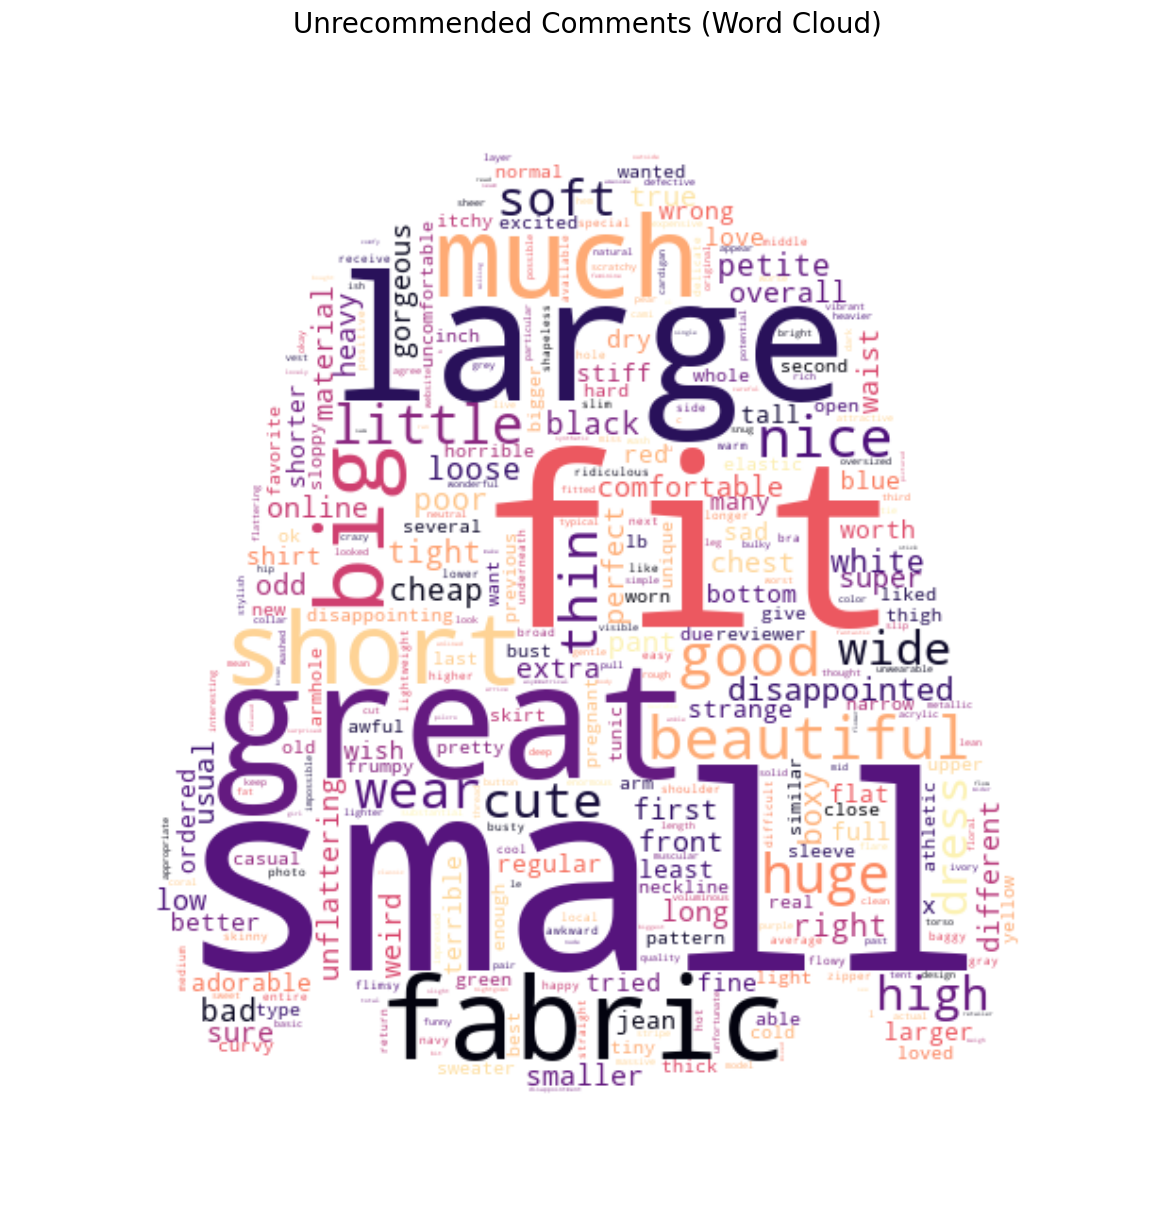

In [29]:
n_df = preprocess_adj(recommended_n['Text'])

# 1. bar plot: Top 20 to 29 frequent terms from comments of unrecommended products
fig = px.bar(x = n_df[20:29].Term, y = n_df[20:29].Frequency,
            color = n_df[20:29].Term,
            text = n_df[20:29].Frequency,
            color_discrete_sequence=px.colors.sequential.RdBu,
            title = 'Top 20~29 Comments of Unrecommended Products (Bar Plot)',
            template = 'simple_white')

idx = [0,1,8]

for index in idx:
    fig.data[index].marker.line.width = 4
    fig.data[index].marker.line.color = "black"
    
fig.update_layout(
    xaxis_title="Top 20~29 Unrecommended Comments",
    yaxis_title="count",
    font = dict(size=17, family = 'Franklin Gothic'))

fig.show()

# 2. create Word Cloud
create_adj_wordcloud(recommended_n['Text'],'Unrecommended Comments (Word Cloud)','magma',mask)

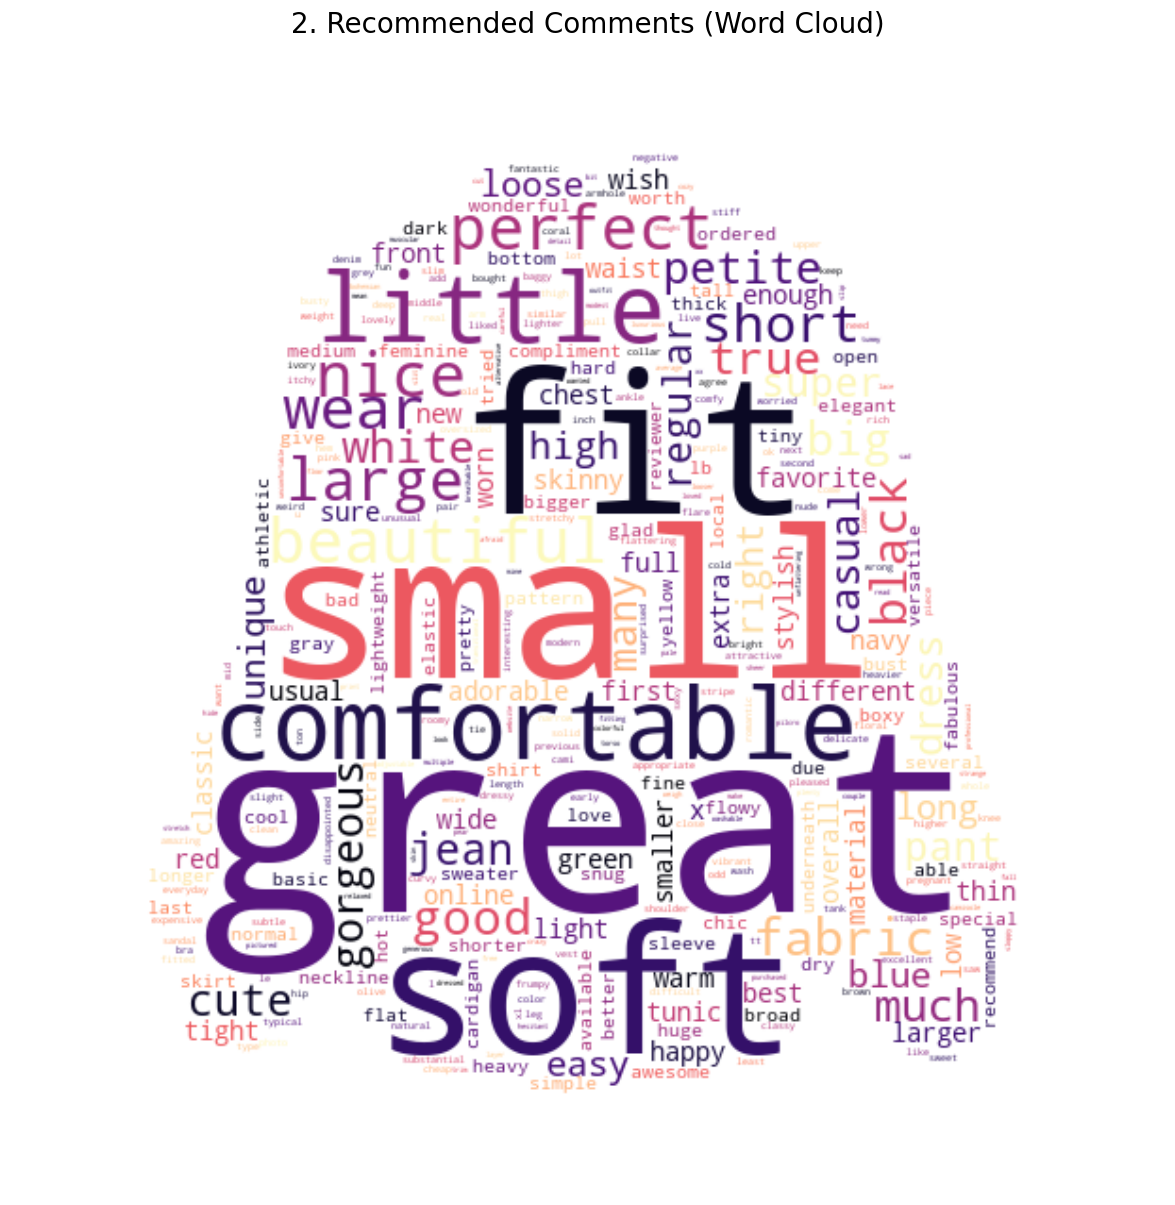

In [30]:
y_df = preprocess_adj(recommended['Text'])

# 1. bar plot: Top 1 to 10 frequent terms from comments of recommended products
fig = px.bar(x = y_df[:10].Term, y = y_df[:10].Frequency,
            color = y_df[:10].Term,
            text = y_df[:10].Frequency,
            color_discrete_sequence=px.colors.sequential.RdBu_r,
            title = '1. Top 10 Comments of Recommended Products (Bar Plot)',
            template = 'simple_white')

idx = [0,4,6,7,8]
for index in idx:
    fig.data[index].marker.line.width = 4
    fig.data[index].marker.line.color = 'black'


fig.update_layout(
    xaxis_title="Top 10 Recommended Comments",
    yaxis_title="count",
    font = dict(size=17, family = 'Franklin Gothic'))

fig.show()

# 2. Word Cloud
create_adj_wordcloud(recommended['Text'],'2. Recommended Comments (Word Cloud)','magma',mask)


In [31]:
# preprocess: remove stopwords-> lemmatize
def preprocess(column):
    all_str = get_all_str(column)
    words = get_word(all_str)
    after_removing = remove_stopword(words)
    lemmatize = lemmatization(after_removing)
    return lemmatize

df['Text'] = df['Text'].apply(preprocess)

In [32]:
y= df['Recommended IND']
X = df.drop('Recommended IND',axis=1)

# split by ratio of 0.3
train_X, test_X, train_y, test_y = train_test_split(X['Text'], y, test_size=0.3, random_state = 8888)    

In [33]:
max_len = max(max(train_X.apply(len).values),max(test_X.apply(len).values))

In [34]:
# for tokenization
def fit_tokenizer(text, oov_token):
    tokenizer = Tokenizer(oov_token = oov_token)
    tokenizer.fit_on_texts(text)
    return tokenizer

# for sequence, padding
def seq_padding(sentences, tokenizer, padding, truncating, maxlen):
    sequences = tokenizer.texts_to_sequences(sentences)    
    pad_trunc_sequences = pad_sequences(sequences, padding = padding, maxlen = maxlen, truncating=padding)
    return pad_trunc_sequences


In [35]:
tokenizer = fit_tokenizer(train_X, "<OOV>")

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

train_X = seq_padding(train_X,tokenizer, 'post', 'post',max_len)
test_X = seq_padding(test_X,tokenizer, 'post', 'post', max_len) 

In [40]:
GLOVE_FILE = '/Volumes/abdullah/Programlama/PYTHON/Miul/git_folder/Data_set/glove.6B.100d.txt'
GLOVE_EMBEDDINGS = {}

encodings_to_try = ['utf-8', 'latin-1', 'cp1252', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        with open(GLOVE_FILE, encoding=encoding) as f:
            for line in f:
                values = line.split()
                word = values[0]
                try:
                    coefs = np.asarray(values[1:], dtype='float32')
                    GLOVE_EMBEDDINGS[word] = coefs
                except ValueError:
                    pass #Hatalı satırları atlar.
        print(f"File successfully read with {encoding} encoding.")
        break  # Exit the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to decode with {encoding} encoding. Trying next encoding.")
    except FileNotFoundError:
        print("File Not Found")
        break

File successfully read with utf-8 encoding.


In [41]:
EMBEDDINGS_MATRIX = np.zeros((VOCAB_SIZE+1, 100))

num = 0
missed_list = []

for word, i in word_index.items():
    embedding_vector = GLOVE_EMBEDDINGS.get(word)
    if embedding_vector is not None:
        EMBEDDINGS_MATRIX[i] = embedding_vector
    else:
        num += 1
        missed_list.append(word)

print('How many missed words? ',num)
print('As example: ',missed_list[:10])

How many missed words?  1577
As example:  ['<OOV>', 'pilcro', 'armhole', '34d', '0p', 'xsp', '36d', '34dd', '32dd', '135lbs']


In [42]:
# define model
def LSTM_model(vocab_size, embedding_dim, maxlen, embeddings_matrix):
    
    model = Sequential()
    
    model.add(Embedding(vocab_size+1,embedding_dim,input_length = maxlen, weights = [embeddings_matrix],trainable=False))
    model.add(Bidirectional(LSTM(64,kernel_regularizer=keras.regularizers.l2(0.001))))
    model.add(Dropout(0.3))
    
    tf.keras.layers.GlobalAveragePooling1D()

    model.add(Dense(6, activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics = ['AUC']) 
    return model

In [43]:
# fitting
model = LSTM_model(VOCAB_SIZE, 100, max_len, EMBEDDINGS_MATRIX)

history = model.fit(train_X, train_y, epochs = 60, batch_size = 128, validation_data=(test_X, test_y))

Epoch 1/60


/Users/abdullahcetin/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - AUC: 0.5661 - loss: 0.8749 - val_AUC: 0.7205 - val_loss: 0.7044
Epoch 2/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - AUC: 0.6247 - loss: 0.7174 - val_AUC: 0.7830 - val_loss: 0.6401
Epoch 3/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - AUC: 0.7125 - loss: 0.6371 - val_AUC: 0.8506 - val_loss: 0.5498
Epoch 4/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - AUC: 0.8078 - loss: 0.5655 - val_AUC: 0.8689 - val_loss: 0.5055
Epoch 5/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - AUC: 0.8328 - loss: 0.5184 - val_AUC: 0.8789 - val_loss: 0.4750
Epoch 6/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - AUC: 0.8439 - loss: 0.4964 - val_AUC: 0.8859 - val_loss: 0.4508
Epoch 7/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - AUC: 0.8550 - loss: 0.4697 - val_AUC: 0.8911 - val_loss: 0.4288
Epoch 8/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - AUC: 0.8511 - loss: 0.4584 - val_AUC: 0.8931 - val_loss: 0.4133
Epoch 9/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - AU

In [46]:
epoch = [x for x in range(1,61)]

color = ['#67001f','#b2182b','#4393c3','#2166ac']

fig1 = go.Figure(data = [
    go.Line(x = epoch, y = history.history['AUC'],line_color=color[0],name='1.auc score'),
    
    go.Line(x = epoch, y = history.history['val_AUC'],line_color=color[3],name='2.val_auc score')
])

fig2 = go.Figure(data = [
    go.Line(x = epoch, y = history.history['loss'],line_color = color[1],name='3.loss'),
    
    go.Line(x = epoch, y = history.history['val_loss'], line_color = color[2],name='4.val_loss')
])

figures = [fig1,fig2]
title = ['AUC & val_AUC Score','Loss & Val_Loss Score']
fig = make_subplots(cols=len(figures),
                   subplot_titles=(title[0], title[1])) 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i+1)
        
fig.update_xaxes(title_text="epochs", row=1, col=1)
fig.update_xaxes(title_text="epochs", row=1, col=2)

fig.update_yaxes(title_text="AUC", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.update_layout(template = "simple_white", title = 'AUC & LOSS',
                 font = dict(size=17, family = 'Franklin Gothic'))

In [47]:
# test probability
test_predict_proba = model.predict(test_X, verbose=0)
# test predicted label
test_prediction_label = (model.predict(test_X) >= 0.5).astype("int32")  

accuracy = accuracy_score(test_y, test_prediction_label)
precision = precision_score(test_y, test_prediction_label)
recall = recall_score(test_y, test_prediction_label)
f1 = f1_score(test_y, test_prediction_label)
AUC = roc_auc_score(test_y, test_predict_proba)

# get list of test scores
test_score_list = [accuracy, precision, recall, f1, AUC]

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


In [48]:
# test probability
train_predict_proba = model.predict(train_X, verbose=0)
# test predicted label
train_prediction_label = (model.predict(train_X) >= 0.5).astype("int32")  

accuracy = accuracy_score(train_y, train_prediction_label)
precision = precision_score(train_y, train_prediction_label)
recall = recall_score(train_y, train_prediction_label)
f1 = f1_score(train_y, train_prediction_label)
AUC = roc_auc_score(train_y, train_predict_proba)

# get list of train scores
train_score_list = [accuracy, precision, recall, f1, AUC]

431/431 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


In [49]:
score_name = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
fig = go.Figure(data=[
    go.Bar(name='Train Scores', 
           x=score_name, y=train_score_list,
           text=np.round(train_score_list,3),marker_color='#67001f'),
    go.Bar(name='Test Scores', 
           x=score_name, y=test_score_list,
           text=np.round(test_score_list,3),marker_color='#fddbc7')
])
fig.update_layout(template = 'simple_white', title = 'Comparison of Train Scores & Test Scores')

fig.update_layout(
    xaxis_title="scoring metrix",
    yaxis_title="score",
    font = dict(size=17, family = 'Franklin Gothic'))

fig.show()